# World Bank Indicators - GDP per capita from 1960 to 2018

<hr>

GDP per capita is gross domestic product divided by midyear total population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. GDP per capita is a good measurement of a country's standard of living, by describing how much citizens benefit from their country's economy. Small, rich countries and more developed industrial countries tend to have the highest per capita GDP.

Data are in current U.S. dollars.

## Import required libraries

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
import matplotlib
import randomcolor
from IPython.display import HTML

rand_color = randomcolor.RandomColor()

In [2]:
plt.style.use('dark_background')

def draw_barchart_race(fig, ax, df, timedelta='D', timeunit='D', interval=250, title='Title', xlabel='Label'):
    items = df['item'].unique().tolist()
    colors = dict(zip(items, rand_color.generate(luminosity='luminosity', count=len(items))))

    df.dropna(inplace=True)
    df = df.set_index('time')
    df = df.groupby('item').resample(timedelta).mean()
    df['value'] = df['value'].interpolate()

    def draw(time):
        ax.clear()
        
        time_plot_df = df[df.index.isin([time], level=1)].sort_values(by='value', ascending=True).tail(10)
        time_plot_df = time_plot_df.reset_index()
        label = np.datetime_as_string(time, unit=timeunit)

        draw_barchart_date(ax, time_plot_df, title=title, label=label, xlabel=xlabel, colors=colors)

    frames = df.index.to_frame()['time'].unique()
    animator = animation.FuncAnimation(fig, draw, frames=frames, interval=interval)
    return animator


def draw_barchart_date(ax, df, title='Title', label='Label', xlabel='Label', colors={}):
    labelsize = 12
    textcolor = 'white'
    
    ax.text(0, 1.06, xlabel, transform=ax.transAxes,
            size=labelsize, color=textcolor)
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors=textcolor, labelsize=labelsize)
    ax.set_yticks([])
    ax.set_axisbelow(True)
    ax.text(0, 1.15, title, transform=ax.transAxes,
            size=24, weight=600, ha='left', va='top')
    ax.text(1, 0, 'Data Show', transform=ax.transAxes, color=textcolor, ha='right', size=16)
    plt.box(False)
    ax.barh(df['item'], df['value'], color=[
           colors[item] if item in colors.keys() else '#8383fc' for item in df['item']], alpha=0.8)
    
    dx = df['value'].max() / 100
    for i, (value, item) in enumerate(zip(df['value'], df['item'])):
        ax.text(
            value - dx, i,
            item,
            size=16,
            weight=600,
            ha='right',
            va='center'
        )
        ax.text(
            value + dx,
            i,
            f'{value: ,.0f}',
            size=14,
            ha='left',
            va='center'
        )

    ax.text(1, 0.06, label, transform=ax.transAxes,
            color='white', size=52, ha='right', weight=800)
    
    return ax


## Data pre-processing

In [3]:
df = pd.read_csv('Data/World_Development_Indicators.csv',
                 header=0,
                 names=['year', 'timecode', 'country', 'countrycode', 'gdp'],
                 usecols=['year', 'country', 'gdp'],
                 dtype={
                     'gdp': np.float
                 },
                 na_values='..')

df.head()

<ipython-input-3-e238b6a8b3f7>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'gdp': np.float


year         country         gdp
0  1960     Afghanistan   59.773194
1  1960         Albania         NaN
2  1960         Algeria  246.308763
3  1960  American Samoa         NaN
4  1960         Andorra         NaN

### Cleaning

In [4]:
df.drop(df.tail(5).index, inplace=True)

df.head()

year         country         gdp
0  1960     Afghanistan   59.773194
1  1960         Albania         NaN
2  1960         Algeria  246.308763
3  1960  American Samoa         NaN
4  1960         Andorra         NaN

## Barchart

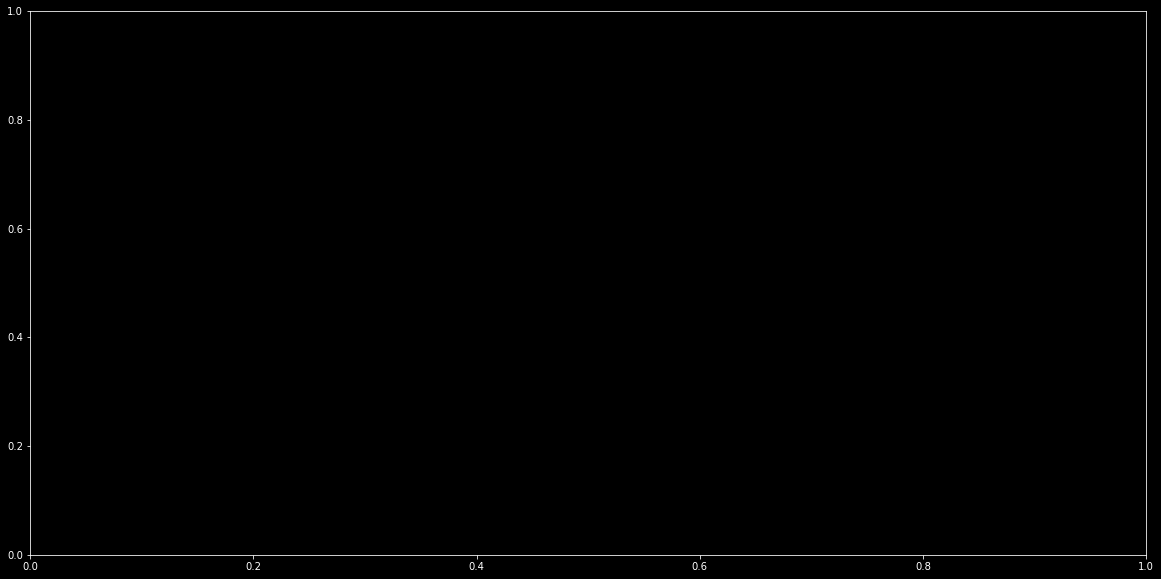

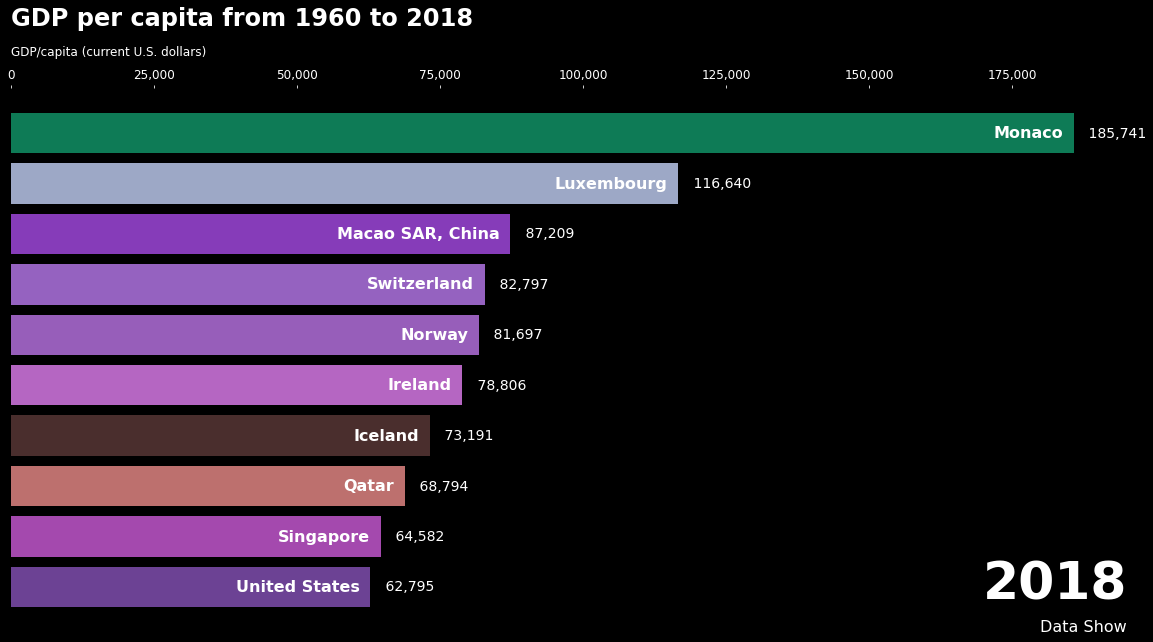

In [5]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.clear()
year = '2018'
date = np.datetime64(year)

chart_df = df.copy()
chart_df['year'] = pd.to_datetime(chart_df['year'])
chart_df.rename(columns={'year': 'time', 'country': 'item', 'gdp': 'value'}, inplace=True)

fig, ax = plt.subplots(figsize=(20, 10))

interval = 500
animator = draw_barchart_race(fig, ax,
                              chart_df,
                              timedelta='Y',
                              timeunit='Y',
                              interval=interval,
                              title='GDP per capita from 1960 to 2018',
                              xlabel='GDP/capita (current U.S. dollars)')

HTML(animator.to_jshtml())

<hr>

## Sources

[World Bank national accounts data, and OECD National Accounts data files](https://databank.worldbank.org/reports.aspx?source=2&series=NY.GDP.PCAP.CD&country=#) under [CC BY-4.0](https://datacatalog.worldbank.org/public-licenses#cc-by) License